In [1]:
import cv2
import numpy  as np 
import pandas as pd
import matplotlib.pylab as plt

In [2]:
def view(img, x=7, y=7, _cmap='autumn_r'):
    plt.figure(figsize=(x, y))
    plt.imshow(img, cmap=_cmap)
    plt.show()

In [3]:
image = cv2.imread('9645_605.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

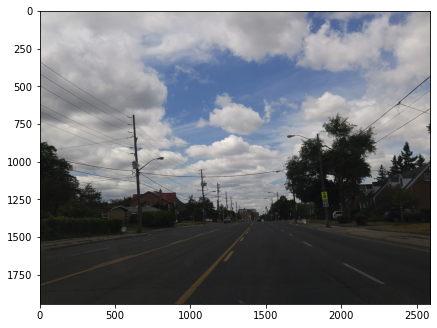

In [4]:
view(image)

In [5]:
h, w, _ = image.shape

In [6]:
region_of_VP = [
    (0, h),
    (w/2, h/2),
    (w, h)
]

In [7]:
def cv_opening(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.erode(img, kernel, iter_erosion)
    img = cv2.dilate(img, kernel, iter_dilatation)
    return img


def cv_closing(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.dilate(img, kernel, iter_dilatation)
    img = cv2.erode(img, kernel, iter_erosion)
    return img


def kernel(n, m):
    kernel  = np.ones((n, m),np.uint8)
    return kernel


def region_of_interest(img, vertices):
    mask             = np.zeros_like(img)
#     channel_count    = img.shape[2]
#     match_mask_color = (255,) * channel_count # (255, 255, 255)
    match_mask_color = 255
    
    cv2.fillPoly(mask, vertices, match_mask_color)
   
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def calculate_hough_lines(img, lines):
    img = img.copy()
    blank_images = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_images, (x1, y1), (x2, y2), (0, 255, 255), 2)
    
    return blank_images


def draw_hough_lines(img, lines, gamma=0.0):
    img = img.copy()
    blank_images = calculate_hough_lines(img, lines)
    
    img = cv2.addWeighted(img, 0.8, blank_images, 1, gamma)
    return img


def get_hough_lines(img, lines):
    blank_array = []
    for line in lines:
        blank_images = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)
        for x1, y1, x2, y2 in line:
            
            l = cv2.line(blank_images, (x1, y1), (x2, y2), (0, 255, 255), 2)
#             l = cv2.cvtColor(l, cv2.COLOR_BGR2GRAY)
            blank_array.append(l)
            
    return np.array(blank_array)

In [8]:
gray  = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(gray, 50, 50)

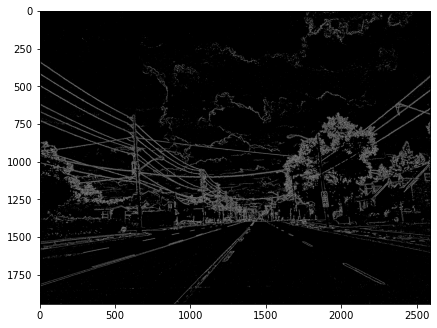

In [9]:
view(canny, _cmap='gray')

In [10]:
cropped_image = region_of_interest(canny, 
                np.array([region_of_VP], np.int32))

In [11]:
lines = cv2.HoughLinesP(cropped_image, 
                        1, np.pi / 180,
                        threshold= 150,
                        minLineLength=500,
                        maxLineGap=100)

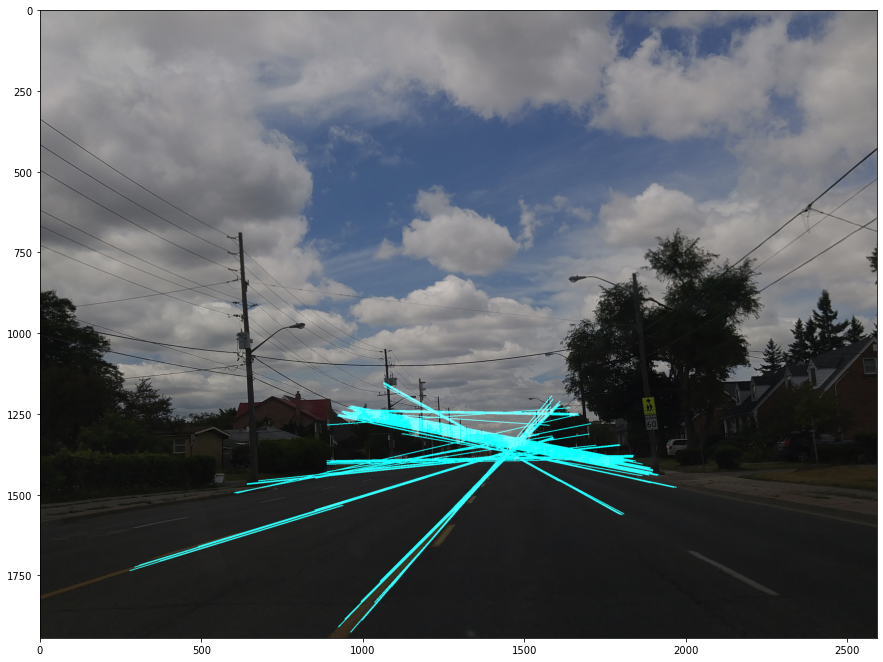

In [12]:
img2 = draw_hough_lines(image, lines)
view(img2, 15, 15)

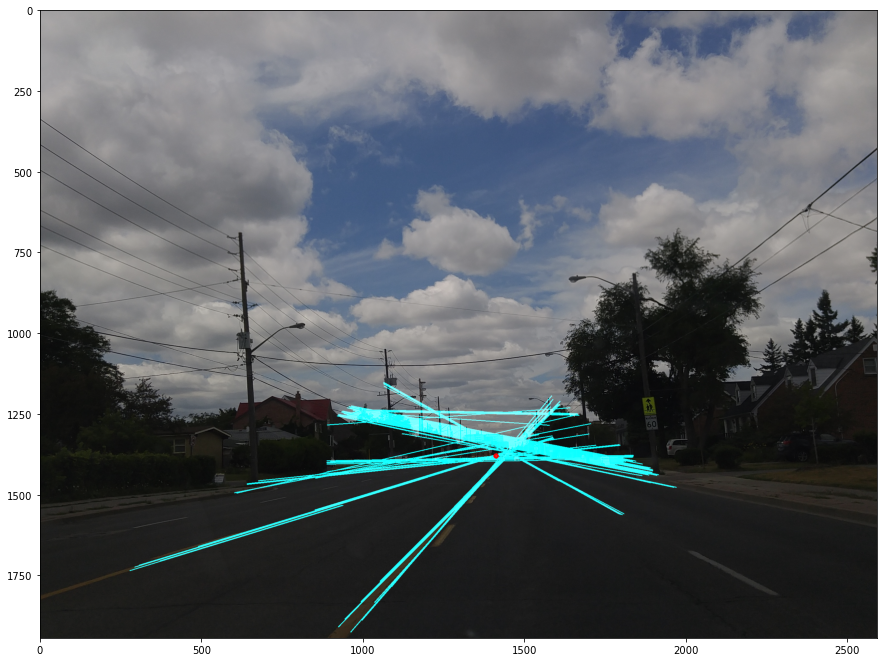

In [13]:
img3 = img2.copy()
view(cv2.circle(img3, (1412, 1380), 5, (255, 0, 0), 5), 15, 15)

In [14]:
#1412, 1380

In [15]:
img4 = img3.copy()
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

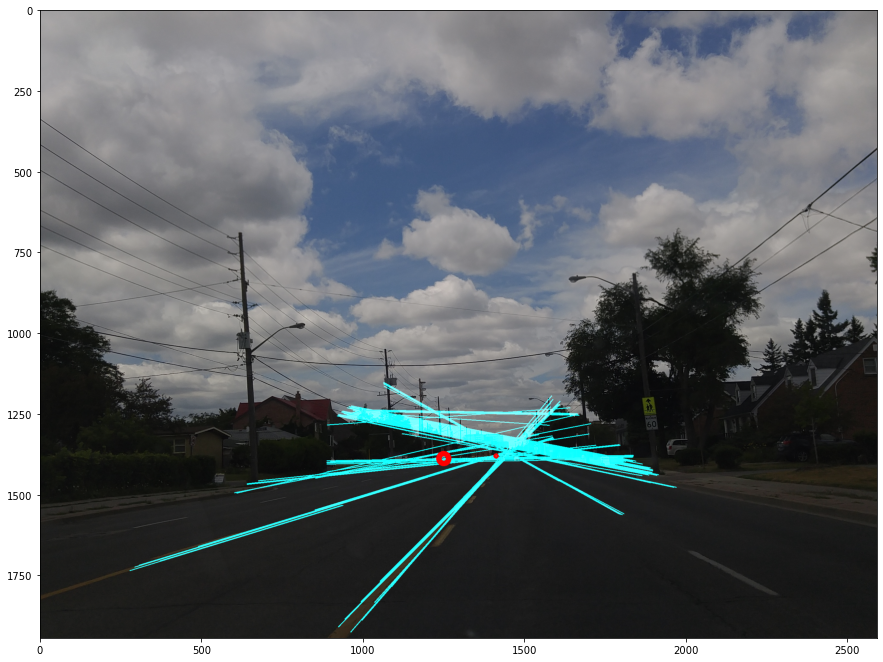

In [16]:
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(img4)
view(cv2.circle(img3, maxLoc, 15, (255, 0, 0), 15), 15, 15)